# Computing image histograms

Histograms show the levels distribution in a set of values; for example, in an image. In this recipe, we understand how to compute histograms.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
image.astype(np.float32)
  Shape: (512, 512, 3)   Data type: float32
[ [125. 137. 226.] [125. 137. 226.] [133. 137. 223.] [128. 136. 223.] [120. 138. 226.] [116. 129. 226.] ]  image_float32: float32
image.astype(np.float32) /255
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]  image_float32_div255: float32
(float32 /255).COLOR_BGR2GRAY   Converted to grayscale
  Shape: (512, 512)   Data type: float32
[ 0.6362471 0.6362471 0.6363059 0.63176864 0.63631374 0.61380786 0.64000005 ]  image_COLOR_BGR2GRAY: float32


<Figure size 432x432 with 0 Axes>

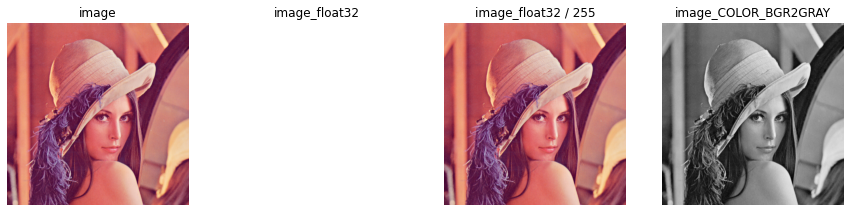

In [2]:
image = cv2.imread('data/Lena.png')

image_float32 = np.copy(image).astype(np.float32)
image_float32_div255 = np.copy(image_float32).astype(np.float32) / 255
image_COLOR_BGR2GRAY = cv2.cvtColor(image_float32_div255, cv2.COLOR_BGR2GRAY)



####################################################
print_image('Original', 'image',  image,0,1,0,7)
print_image('image.astype(np.float32)', 'image_float32',  image_float32,0,1,0,6)
print_image('image.astype(np.float32) /255', 'image_float32_div255',  image_float32_div255,0,1,0,7)
print_image('(float32 /255).COLOR_BGR2GRAY   Converted to grayscale', 'image_COLOR_BGR2GRAY',  image_COLOR_BGR2GRAY,0,1,0,7)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],
                    ["image_float32 / 255",image_float32_div255[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2GRAY",image_COLOR_BGR2GRAY]  
                   ])

cv2.imshow('image_COLOR_BGR2GRAY', np.hstack([image_COLOR_BGR2GRAY]))
cv2.waitKey()
cv2.destroyAllWindows()

image_grey = cv2.imread(..., 0)
  Shape: (512, 512)   Data type: uint8
[ 169 169 168 167 169 164 170 167 170 167 169 167 ]  image_grey: uint8
image_COLOR_BGR2GRAY *255
  Shape: (512, 512)   Data type: uint8
[ 162 162 162 161 162 156 163 160 164 160 161 159 ]  image_COLOR_BGR2GRAY_255: uint8
image_grey.astype(np.float32)
  Shape: (512, 512)   Data type: float32
[ 169.0 169.0 168.0 167.0 169.0 164.0 170.0 167.0 170.0 167.0 ]  image_grey: float32
image_COLOR_BGR2GRAY   Converted to grayscale
  Shape: (512, 512)   Data type: float32
[ 0.6362471 0.6362471 0.6363059 0.63176864 0.63631374 0.61380786 0.64000005 0.6300667 0.6452196 0.63009024 ]  image_COLOR_BGR2GRAY: float32


<Figure size 1080x432 with 0 Axes>

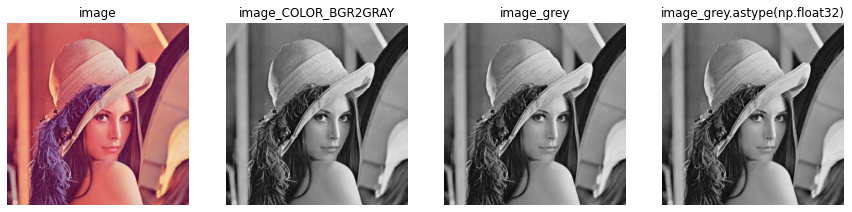

In [3]:
image_grey = cv2.imread('data/Lena.png', 0)
image_COLOR_BGR2GRAY_255 = np.copy(image_COLOR_BGR2GRAY)
image_COLOR_BGR2GRAY_255 = (image_COLOR_BGR2GRAY_255*255).astype(np.uint8)



################################################
print_image('image_grey = cv2.imread(..., 0)', 'image_grey',  image_grey,0,1,0,12)
print_image('image_COLOR_BGR2GRAY *255', 'image_COLOR_BGR2GRAY_255',  image_COLOR_BGR2GRAY_255,0,1,0,12)
print_image('image_grey.astype(np.float32)', 'image_grey',  image_grey.astype(np.float32),0,1,0,10)
print_image('image_COLOR_BGR2GRAY   Converted to grayscale', 'image_COLOR_BGR2GRAY',  image_COLOR_BGR2GRAY,0,1,0,10)


plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2GRAY",image_COLOR_BGR2GRAY],
                    ["image_grey",image_grey],
                    ["image_grey.astype(np.float32)",image_grey.astype(np.float32)]
                   ])

cv2.imshow('grey, image_COLOR_BGR2GRAY *255', np.hstack([image_grey, image_COLOR_BGR2GRAY]))
cv2.waitKey()
cv2.destroyAllWindows()

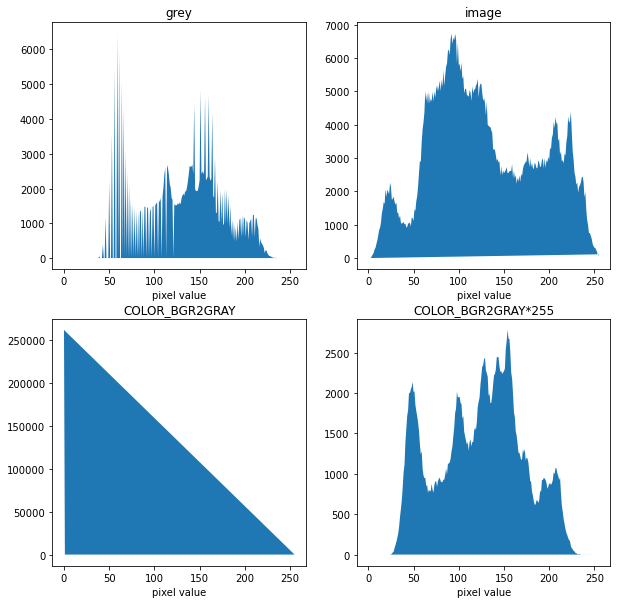

In [4]:
# Arguments of the routine are 
# the input image, number of bins, and range of bins. 
# It returns an array with histogram values and edge values for bins.
hist_grey,  bins_grey  = np.histogram(image_grey, 256, [0, 255])
hist_image, bins_image = np.histogram(image, 256, [0, 255])
hist_COLOR_BGR2GRAY,     bins_COLOR_BGR2GRAY     = np.histogram(image_COLOR_BGR2GRAY, 256, [0, 255])
hist_COLOR_BGR2GRAY_255, bins_COLOR_BGR2GRAY_255 = np.histogram(image_COLOR_BGR2GRAY_255, 256, [0, 255])

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("grey")
plt.fill(hist_grey)
plt.xlabel('pixel value')
plt.subplot(2,2,2)
plt.title("image")
plt.fill(hist_image)
plt.xlabel('pixel value')
plt.subplot(2,2,3)
plt.title("COLOR_BGR2GRAY")
plt.fill(hist_COLOR_BGR2GRAY)
plt.xlabel('pixel value')
plt.subplot(2,2,4)
plt.title("COLOR_BGR2GRAY*255")
plt.fill(hist_COLOR_BGR2GRAY_255)
plt.xlabel('pixel value')

plt.show()